In [1]:
# Load original dataset
import pandas as pd

file_path = '../../data/lm2.csv'
data_df = pd.read_csv(file_path)
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

Num of features: 53


,Label,Outer left eyebrow-x,Outer left eyebrow-y,Middle left eyebrow-x,Middle left eyebrow-y,Inner left eyebrow-x,Inner left eyebrow-y,Inner right eyebrow-x,Inner right eyebrow-y,Middle right eyebrow-x,...,Lower lip inner middle-x,Lower lip inner middle-y,Lower lip outer middle-x,Lower lip outer middle-y,Chin middle-x,Chin middle-y,Left ear lobe-x,Left ear lobe-y,Right ear lobe-x,Right ear lobe-y
0,HAPPY,79.4496,557.174,176.086,436.378,433.784,444.431,675.375,452.484,908.914,...,546.527,1161.15,554.580,1225.58,570.686,1499.38,NaN,NaN,NaN,NaN
1,ANGER,90.6538,530.365,209.062,467.214,465.614,518.524,678.749,502.736,883.991,...,603.953,1118.97,595.863,1130.30,590.090,1467.86,NaN,NaN,NaN,NaN
2,SURPRISE,86.5398,546.773,117.065,398.508,378.710,415.951,710.126,398.508,915.081,...,544.418,1261.94,535.696,1331.71,548.779,1567.19,36.7298,978.497,1078.27,947.863
3,FEAR,104.6750,518.635,179.731,439.410,384.049,435.240,680.102,443.580,851.062,...,555.009,1223.32,563.349,1335.91,571.688,1552.74,NaN,NaN,NaN,NaN
4,DISGUST,115.4420,526.418,241.744,459.320,435.145,514.577,648.280,490.895,845.627,...,585.227,1116.66,589.076,1150.04,596.969,1438.16,74.5932,913.326,NaN,NaN


In [2]:
# Drop features where 'NaN' is present
data_df = data_df.dropna(axis=1, how='any')
print('Num of features: %s' % len(data_df.columns.values))
data_df.head()

Num of features: 43


,Label,Outer left eyebrow-x,Outer left eyebrow-y,Middle left eyebrow-x,Middle left eyebrow-y,Inner left eyebrow-x,Inner left eyebrow-y,Inner right eyebrow-x,Inner right eyebrow-y,Middle right eyebrow-x,...,Upper lip outer middle-x,Upper lip outer middle-y,Right mouth corner-x,Right mouth corner-y,Upper lip inner middle-x,Upper lip inner middle-y,Lower lip inner middle-x,Lower lip inner middle-y,Lower lip outer middle-x,Lower lip outer middle-y
0,HAPPY,79.4496,557.174,176.086,436.378,433.784,444.431,675.375,452.484,908.914,...,558.606,1072.57,796.171,1072.57,550.553,1104.78,546.527,1161.15,554.580,1225.58
1,ANGER,90.6538,530.365,209.062,467.214,465.614,518.524,678.749,502.736,883.991,...,599.810,1086.88,816.893,1110.57,599.810,1110.57,603.953,1118.97,595.863,1130.30
2,SURPRISE,86.5398,546.773,117.065,398.508,378.710,415.951,710.126,398.508,915.081,...,531.336,1113.67,714.487,1187.80,540.057,1148.56,544.418,1261.94,535.696,1331.71
3,FEAR,104.6750,518.635,179.731,439.410,384.049,435.240,680.102,443.580,851.062,...,559.179,1044.03,763.497,1085.72,563.349,1077.38,555.009,1223.32,563.349,1335.91
4,DISGUST,115.4420,526.418,241.744,459.320,435.145,514.577,648.280,490.895,845.627,...,593.023,1051.36,837.733,1094.78,596.969,1098.73,585.227,1116.66,589.076,1150.04


In [3]:
# Compute the distance from all points to the nose tip (intuition: nose tip position is likely to be similar regardless of emotion)
import math

def get_euclidean_distance(x1, x2, y1, y2):
    '''
    Return the euclidean distance between two points
    '''
    term_1 = x1 - x2
    term_2 = y1 - y2
    return math.sqrt(term_1 ** 2 + term_2 ** 2 )

# Create new dataset using distance from each landmark to the nose tip as features
all_landmarks = ['Outer left eyebrow', 'Middle left eyebrow', 'Inner left eyebrow', 'Inner right eyebrow', 'Middle right eyebrow', 'Outer right eyebrow', 'Left temple', 'Outer left eye corner', 'Inner left eye corner', 'Inner right eye corner', 'Outer right eye corner', 'Right temple', 'Nose saddle left', 'Nose saddle right', 'Left nose peak', 'Right nose peak', 'Left mouth corner', 'Upper lip outer middle', 'Right mouth corner', 'Upper lip inner middle', 'Lower lip inner middle', 'Lower lip outer middle', 'Chin middle', 'Left ear lobe', 'Right ear lobe']
valid_landmarks = []

# Remove landmarks which were previously removed due to undefined values ('NaN')
columns = data_df.columns.values
for landmark in all_landmarks:
    if landmark + '-x' in columns and  landmark + '-y' in columns:
        valid_landmarks.append(landmark)
        
# Create dictionary to temporarily hold distance values
d = {}
for landmark in valid_landmarks:
    d[landmark + '-distance'] = []
    
# For each feature, compute distance from nose tip
for _, row in data_df.iterrows():
    for landmark in valid_landmarks:
        nose_x, nose_y = (row['Nose tip-x'], row['Nose tip-y'])
        landmark_x, landmark_y = (row[landmark + '-x'], row[landmark + '-y'])
        distance = get_euclidean_distance(landmark_x, nose_x, landmark_y, nose_y)
        d[landmark + '-distance'].append(distance)

In [4]:
# Create new dataframe (with distance from each feature to nose tip)
new_df = pd.concat([data_df[['Label']], pd.DataFrame.from_dict(d)], axis = 1)
new_df.head()

,Label,Inner left eye corner-distance,Inner left eyebrow-distance,Inner right eye corner-distance,Inner right eyebrow-distance,Left mouth corner-distance,Left nose peak-distance,Lower lip inner middle-distance,Lower lip outer middle-distance,Middle left eyebrow-distance,...,Nose saddle left-distance,Nose saddle right-distance,Outer left eye corner-distance,Outer left eyebrow-distance,Outer right eye corner-distance,Outer right eyebrow-distance,Right mouth corner-distance,Right nose peak-distance,Upper lip inner middle-distance,Upper lip outer middle-distance
0,HAPPY,297.831252,455.150020,298.851438,450.063255,323.435445,160.442570,276.559753,341.009790,583.438327,...,298.991866,301.534315,467.936613,572.910552,471.069484,566.272147,310.067169,152.342279,220.175190,188.180022
1,ANGER,339.238567,381.048521,317.530065,386.245112,310.725384,152.824883,240.701545,251.698214,560.782249,...,298.634653,301.711386,496.060458,608.893667,471.410580,566.459261,324.373455,150.044275,232.105614,208.438757
2,SURPRISE,310.840237,498.995762,327.111617,520.263588,343.942428,136.994860,372.863253,442.563158,645.863384,...,326.950795,316.717573,460.359724,565.867471,471.624484,616.776342,347.370657,156.799950,259.428104,224.594412
3,FEAR,325.703578,458.191004,324.707988,438.606055,319.023552,136.717941,360.966256,473.712145,562.032930,...,301.894549,311.167427,492.100778,562.427710,482.531825,584.070368,309.083194,159.484080,215.414073,181.879798
4,DISGUST,330.512636,373.931348,328.746551,386.481891,319.889063,140.851992,250.835962,284.434519,517.168617,...,312.117052,318.750971,455.743065,559.944867,493.541260,578.315301,359.265905,155.836032,234.576694,187.214468


In [5]:
features = [x != 'Label' for x in new_df.columns.values]

# Separating out the features
values = new_df.loc[:, features].values

# Separating out the label
labels = new_df.loc[:,['Label']].values

In [6]:
# Scale values (mean = 0 and variance = 1)
from sklearn.preprocessing import normalize

# values = normalize(values, axis=0)

In [7]:
from sklearn.decomposition import PCA

# Use PCA to reduce dimensionality
pca = PCA(n_components=2)
principal_components = pca.fit_transform(values)
principal_df = pd.DataFrame(data = principal_components, columns = ['PCA 1', 'PCA 2'])

# Add the label to the dataframe with the principal components
principal_labels_df = pd.concat([new_df[['Label']], principal_df], axis = 1)
principal_labels_df.head()

,Label,PCA 1,PCA 2
0,HAPPY,-93.608018,4.240400
1,ANGER,-114.221754,-86.195848
2,SURPRISE,-73.255853,195.749152
3,FEAR,-31.270204,92.136688
4,DISGUST,-83.989451,-78.376249


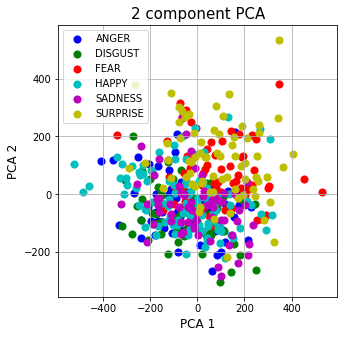

In [14]:
# Visualize the PCA 2d projection
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA 1', fontsize = 12)
ax.set_ylabel('PCA 2', fontsize = 12)
ax.set_title('2 component PCA', fontsize = 15)

targets = ['ANGER', 'DISGUST', 'FEAR', 'HAPPY', 'SADNESS', 'SURPRISE']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
for target, color in zip(targets, colors):
    indexes_to_keep = principal_labels_df['Label'] == target
    ax.scatter(
        principal_labels_df.loc[indexes_to_keep, 'PCA 1'],
        principal_labels_df.loc[indexes_to_keep, 'PCA 2'],
        c = color,
        s = 50
    )
ax.legend(targets)
ax.grid()
plt.show()

In [15]:
from sklearn import manifold

# Use tSNE to reduce dimensionality
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
tsne_components = tsne.fit_transform(values)
tsne_df = pd.DataFrame(data = tsne_components, columns = ['tSNE 1', 'tSNE 2'])

# Add the label to the dataframe with the tSNE components
tsne_labels_df = pd.concat([new_df[['Label']], tsne_df], axis = 1)
tsne_labels_df.head()

,Label,tSNE 1,tSNE 2
0,HAPPY,-132.598343,2.944672
1,ANGER,-130.998596,-69.010452
2,SURPRISE,-43.998264,198.461441
3,FEAR,-64.588425,63.078159
4,DISGUST,-109.608040,-39.400860


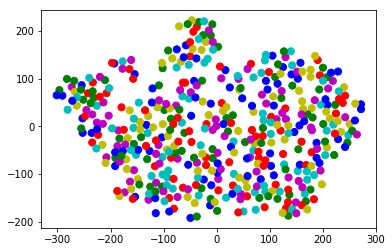

In [16]:
# Visualize the PCA 2d projection
plt.scatter(tsne_components[:,0], tsne_components[:,1], c=colors, s=50)
plt.show()

In [67]:
# Prepare data for classification
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into training and test sets
train, test = train_test_split(tsne_labels_df, test_size=0.2)
                               
# Split train and test labels/data
train_data = train.iloc[:,1:].values
train_labels = train.iloc[:,:1].values.ravel()
test_data = test.iloc[:,1:].values
test_labels = test.iloc[:,:1].values.ravel()

In [68]:
# Use KNN to predict
kNNClassifier = neighbors.KNeighborsClassifier(n_neighbors=10).fit(train_data, train_labels)
predicted_labels = kNNClassifier.predict(test_data)
acc_svm = accuracy_score(test_labels, predicted_labels)
print("kNNClassifier accuracy: ", acc_svm)

kNNClassifier accuracy:  0.340659340659


In [69]:
# Use SVM to predict
from sklearn.svm import LinearSVC

clf_svm = LinearSVC()
clf_svm.fit(train_data, train_labels)
predicted_labels = clf_svm.predict(test_data)
acc_svm = accuracy_score(test_labels, predicted_labels)
print("Linear SVM accuracy: ", acc_svm)

Linear SVM accuracy:  0.21978021978
